 PCA = principle component analysis
This reduces complexity and avoids overfitting of data.
PCA does compression by finding the most important features. 
All the principle components are orthogonal i.e. they are linearly independent to each other. These do not share any directionality and first component has highest variance means it has more information.
Steps Followed:
	Organize data as n by m matrix, where n is samples and m is features. 
	Mean center the data
 X=X-X_mean
	Compute the Singular Value decomposition
X=U∑V^T .. eq1
U=left signal vector
Sigma is diagonal matrix containing singular values
V is the right singular vector
	Project the data into new feature space
Finding principle components amounts to finding an orthonormal basis that spans the column space of X
Feature space will be 
F=VX
Multiply each side of eq 1 by V because V is orthonormal
VX= U∑
F= U∑
Till now we have only projected our data to new place.
To reduce or compress sigma we need to work on sigma.
So to get the amount of reduction just zero the singular value at the diagonal. Now select the matrix of required dimensionality and the important to work on this from descending order because the initial components contain the most information.



In [18]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
%matplotlib notebook
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [30]:
DataFile = pd.read_csv('C:/Users/muneeba/Desktop/THESIS/DataDistributionPCA.csv') 
DataFile=DataFile[:65]
DataFile=DataFile.iloc[:,4:60]
DataFile.describe()
data_frame = pd.DataFrame( DataFile)
n_components =2
pca_model = PCA(n_components)
X_projected = pca_model.fit_transform(data_frame)
print(X_projected.shape)
print(np.sum(pca_model.explained_variance_ratio_))

(64, 3)
0.999998051749


In [25]:
X_reconstructed = pca_model.inverse_transform(X_projected)

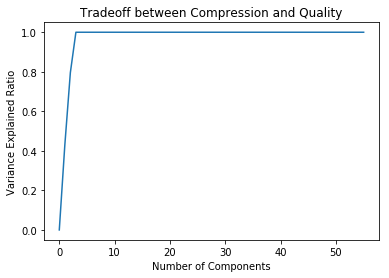

[0.0,
 0.42929309888299694,
 0.79579935418396464,
 0.99999805174867817,
 0.99999847571903255,
 0.99999881739864038,
 0.99999909976821433,
 0.99999930273895199,
 0.99999944516263783,
 0.9999995649068818,
 0.99999967176156124,
 0.99999974867450536,
 0.99999981685197148,
 0.99999987086854458,
 0.99999991397360899,
 0.99999994049519703,
 0.99999995649817941,
 0.99999997010804231,
 0.99999997593690515,
 0.99999998084522768,
 0.99999998438819915,
 0.99999998765155451,
 0.9999999901500134,
 0.99999999238855375,
 0.99999999418124708,
 0.99999999558532571,
 0.99999999686526819,
 0.99999999775487591,
 0.99999999841444276,
 0.99999999896114988,
 0.99999999924115135,
 0.99999999943490092,
 0.99999999961206953,
 0.99999999975367126,
 0.99999999981245591,
 0.99999999985593757,
 0.99999999988939559,
 0.99999999991554533,
 0.99999999993755329,
 0.99999999995861788,
 0.99999999997233113,
 0.99999999998301647,
 0.99999999998943567,
 0.99999999999433842,
 0.99999999999789368,
 0.99999999999945088,
 0.999

In [38]:
n_components_samples = list(range(0, 56))
variances = []
for n_components_sample in n_components_samples:
    pca_model = PCA(n_components_sample)
    X_projected = pca_model.fit_transform(data_frame)
    variance=np.sum(pca_model.explained_variance_ratio_)
    variances.append(variance)

plt.title("Tradeoff between Compression and Quality")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained Ratio")
plt.plot(n_components_samples, variances)
plt.show()
variances